# Practicing EDA & Linear Regression on Medical Insurance dataset

In [1]:
# Importing essential libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style # used to style the graphs and charts
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings # for ignoring any warnings
warnings.filterwarnings('ignore') # to ignore warnings

In [2]:
mci=pd.read_csv("medical_cost_insurance.csv") # loading and reading the data
mci

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
mci.shape

(1338, 7)

In [4]:
mci.info() # checking any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
mci.isnull().sum() # checking any null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Observations from above:

- No missing values in the dataset

In [6]:
mci['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [7]:
mci['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [8]:
mci.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
mci.describe() # Statistical summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


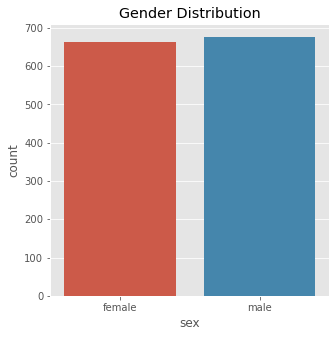

In [10]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sb.countplot(x='sex',data=mci)
plt.title('Gender Distribution')
plt.show()

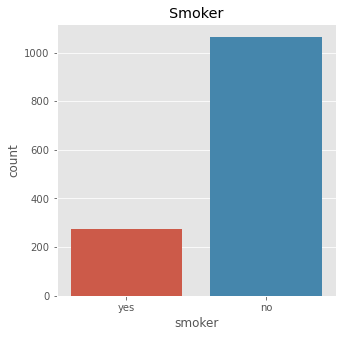

In [11]:
plt.figure(figsize=(5,5))
sb.countplot(x='smoker',data=mci)
plt.title('Smoker')
plt.show()

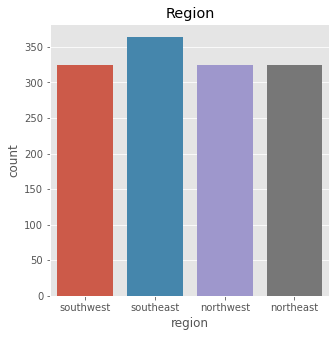

In [12]:
plt.figure(figsize=(5,5))
sb.countplot(x='region',data=mci)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

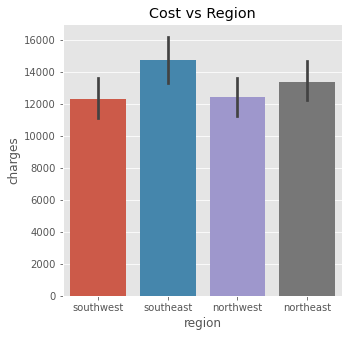

In [13]:
plt.figure(figsize=(5,5))
sb.barplot(x='region',y='charges',data=mci)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

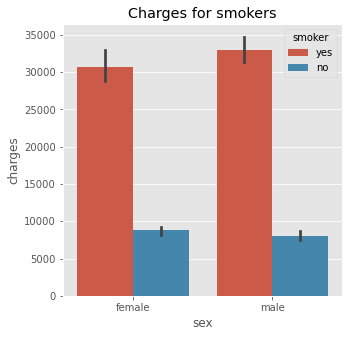

In [14]:
plt.figure(figsize=(5,5))
sb.barplot(x='sex',y='charges',hue='smoker',data=mci)
plt.title('Charges for smokers')

<AxesSubplot:xlabel='region', ylabel='charges'>

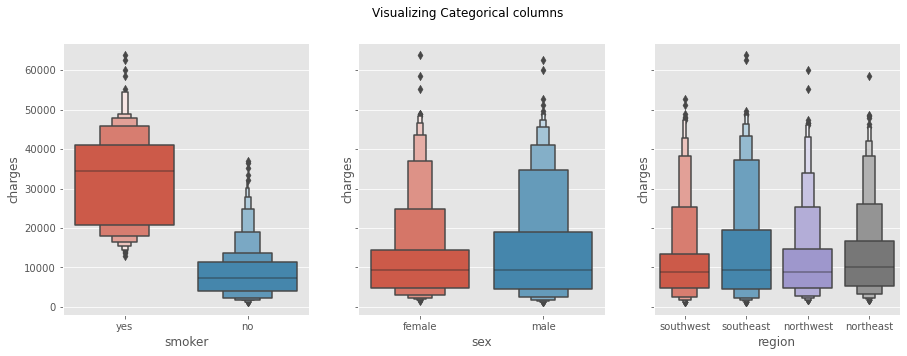

In [15]:
fig,axes=plt.subplots(1,3,figsize=(15,5),sharey=True) # subplot of 1x3; sharing y-axis with all plots
fig.suptitle('Visualizing Categorical columns')
sb.boxenplot(x='smoker',y='charges',data=mci,ax=axes[0])
sb.boxenplot(x='sex',y='charges',data=mci,ax=axes[1])
sb.boxenplot(x='region',y='charges',data=mci,ax=axes[2])

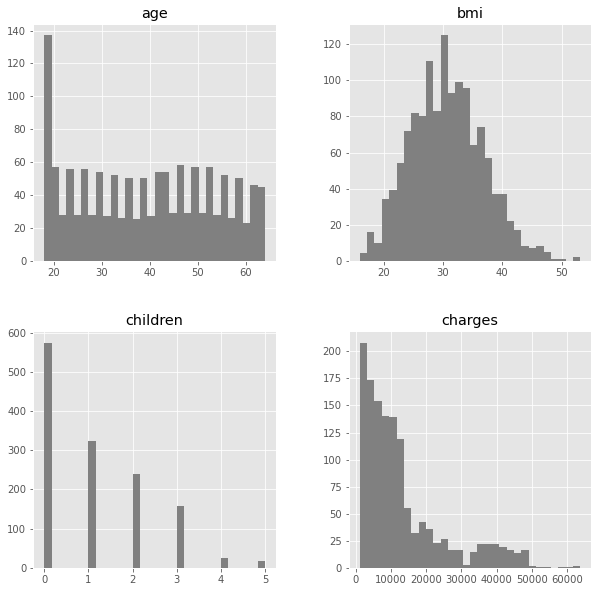

In [16]:
mci[['age','bmi','children','charges']].hist(bins=30,figsize=(10,10),color='grey')
plt.show()

## Displaying Distribution plot

Text(0, 0.5, 'Count')

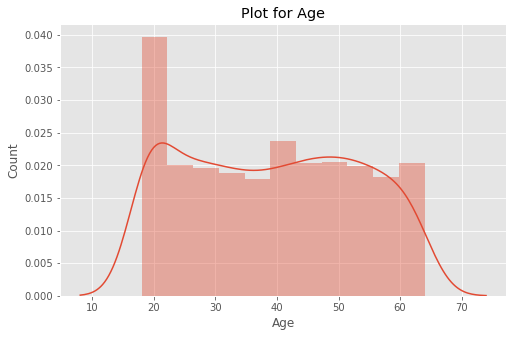

In [17]:
plt.figure(figsize=(8,5))
sb.distplot(mci['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

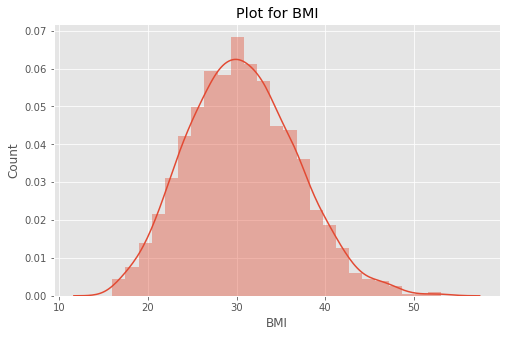

In [18]:
plt.figure(figsize=(8,5))
sb.distplot(mci['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

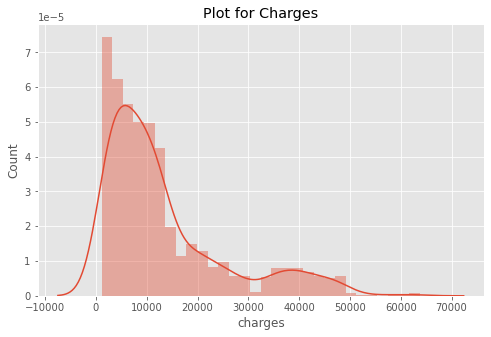

In [19]:
plt.figure(figsize=(8,5))
sb.distplot(mci['charges'])
plt.title('Plot for Charges')
plt.xlabel('charges')
plt.ylabel('Count')

### Observations from above visualizations:

- Data in Age is distributed from age 19 to 64
- Data in BMI is normally distributed
- Data in Charges is right skewed / +vely skewed with few outliers

In [20]:
mci.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Converting Categorical data into Numerical data

In [21]:
mci['sex']=mci['sex'].apply({'male':0,'female':1}.get)
mci['smoker']=mci['smoker'].apply({'yes':1,'no':0}.get)
mci['region']=mci['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)

In [22]:
mci.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


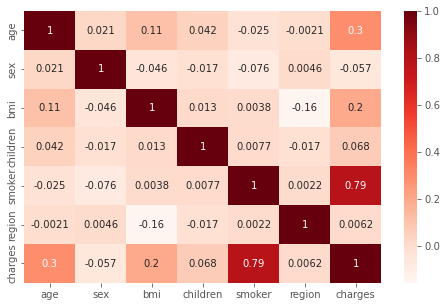

In [23]:
plt.figure(figsize=(8,5))
sb.heatmap(mci.corr(),cmap='Reds',annot=True)
plt.show()

### Observations from above Correlation:

- Smoker, BMI and Age are most important factor that determnines Charges
- We found that Sex, Children and Region do not affect the Charges

In [24]:
print(mci['sex'].value_counts().sort_values()) 
print(mci['smoker'].value_counts().sort_values())
print(mci['region'].value_counts().sort_values())

1    662
0    676
Name: sex, dtype: int64
1     274
0    1064
Name: smoker, dtype: int64
4    324
1    325
3    325
2    364
Name: region, dtype: int64


### Plotting Skewness and Kurtosis

In [25]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(mci.columns):
    print('{0} : Skewness {1:.3f} and Kurtosis {2:.3f}'.format(col,mci[col].skew(),mci[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and Kurtosis -1.245
sex : Skewness 0.021 and Kurtosis -2.003
bmi : Skewness 0.284 and Kurtosis -0.051
children : Skewness 0.938 and Kurtosis 0.202
smoker : Skewness 1.465 and Kurtosis 0.146
region : Skewness 0.038 and Kurtosis -1.328
charges : Skewness 1.516 and Kurtosis 1.606


In [26]:
X=mci.drop(['charges','sex'],axis=1)
y=mci.charges

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shpae: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shpae:  (936,)
y_test shape:  (402,)


## Linear Regression

In [28]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [29]:
from sklearn.metrics import r2_score # importing r2_score

In [30]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7697211527941855


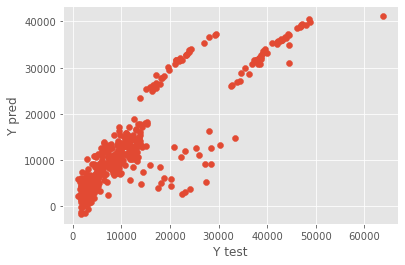

In [31]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [32]:
data={'age':50, 'bmi':25, 'children':2, 'smoker':0, 'region':2}
index=[0]
cust_df=pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [33]:
cost_pred=linreg.predict(cust_df)
print("The medical insurance cost of the non-smoker customer is: ", cost_pred)

The medical insurance cost of the non-smoker customer is:  [9579.86504857]


### From above, we can conclude the Insurance cost for non-smoker person is below ₹ 10k

In [34]:
data={'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index=[0]
cust_df=pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [35]:
cost_pred=linreg.predict(cust_df)
print("The medical insurance cost of the smoker customer is: ", cost_pred)

The medical insurance cost of the smoker customer is:  [33206.92756082]


### From above, we can conclude the Insurance cost for non-smoker person is above ₹ 33k